# Own model
This Jupyter Notebook is divided into two main codes. The first code under the Markdown [“Google Colab”](#google-colab) can work with the instructions in Google Colab. The second code under the markdown [“Local”](#local) can be executed locally. 

In [2]:
#uncoment the following two lines if running in google colab
#from google.colab import drive 
#drive.mount('/content/drive') 

import tensorflow as tf
import matplotlib.pyplot as plt

# Google Colab
The code below is intended for execution in Google Colab. To execute the code in Google Colab you have to comment out the above import for Google Colab and compress the already restructured folder into a zip file and upload “Dataset_Original.zip” to your Google Drive.

You can then extract the folder with the ZIP extractor.

<img src="ImageLib/GoogleDriveZip.jpg" alt="GoogleDrive image" style="width:700px;"/>

Furthermore, you have to make sure that the paths point correctly to your Google Drive folder

In [ ]:
# Directories for training and test data
train_dir = '/content/drive/MyDrive/ML2/Dataset_Original/train'
test_dir = '/content/drive/MyDrive/ML2/Dataset_Original/test'

# Image sizes and batch size
IMAGE_SIZE = (224, 224) 
IMAGE_SHAPE = IMAGE_SIZE + (3,) 
BATCH_SIZE = 32


# Load the images from the directories
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="validation"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999
)

# Add standardization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the datasets
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetching und Caching for efficiency
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Definiere die Datenaugmentierungsschichten
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

# Define the CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model_1.summary()

# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model_1.fit(
    train_dataset,
    epochs=9,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model_1.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')
plt.show()

# Local

This code can be executed locally. It uses the data augmentation script “dataPreparation.py”. Please check that the path to your data set matches.

Found 1178 files belonging to 3 classes.
Using 884 files for training.
Found 1178 files belonging to 3 classes.
Using 294 files for validation.
Found 393 files belonging to 3 classes.
Klassennamen: ['gls', 'nlb', 'nls']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,163 (42.47 MB)

 Trainable params: 11,132,163 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 768ms/step - accuracy: 0.3956 - loss: 2.1170 - val_accuracy: 0.5544 - val_loss: 0.7953
Epoch 2/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 452ms/step - accuracy: 0.6051 - loss: 0.7588 - val_accuracy: 0.6803 - val_loss: 0.7229
Epoch 3/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step - accuracy: 0.7574 - loss: 0.5473 - val_accuracy: 0.8129 - val_loss: 0.5038
Epoch 4/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 533ms/step - accuracy: 0.8076 - loss: 0.4677 - val_accuracy: 0.8061 - val_loss: 0.5058
Epoch 5/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - accuracy: 0.8314 - loss: 0.4189 - val_accuracy: 0.8571 - val_loss: 0.3754
Epoch 6/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 508ms/step - accuracy: 0.8480 - loss: 0.3944 - val_accuracy: 0.8537 - val_loss: 0.3863
Epoch 7/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 516ms/step - accuracy: 0.8549 - loss: 0.3786 - val_accuracy: 0.8605 - val_loss: 0.4218
Epoch 8/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 512ms/step - accuracy: 0.8608 - loss: 0.3807 - val_accuracy: 0.

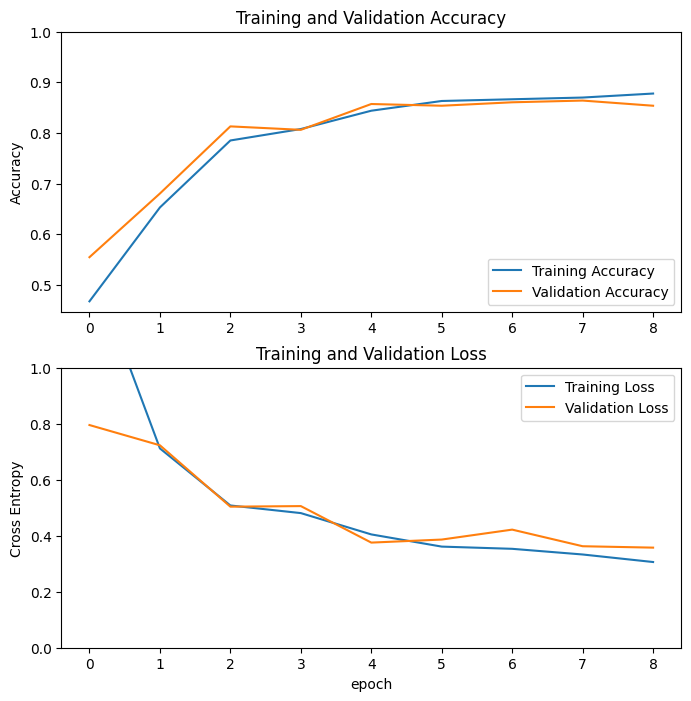

In [3]:
# Directories for training and test data
train_dir = '../ML2Project/Dataset_Original/train'
test_dir = '../ML2Project/Dataset_Original/test'

from dataPreparation import load_and_prepare_datasets, get_data_augmentation


# Image sizes and batch size
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3,)
BATCH_SIZE = 32

# Load and prepare the dataset
train_dataset, validation_dataset, test_dataset, class_names = load_and_prepare_datasets(train_dir, test_dir, IMAGE_SIZE, BATCH_SIZE)

# Show class names
print("Klassennamen:", class_names)

# Get the data augmentation layers
data_augmentation = get_data_augmentation()

# Define the CNN model
model_1= tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model_1.summary()

# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model_1.fit(
    train_dataset,
    epochs=9,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model_1.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')
plt.show()

In [6]:
#Safe model
model_1.save('modelLib/model_1.keras')

#Safe class names
with open('../modelLib/class_names.txt', 'w') as f:
    for class_name in class_names:
        f.write("%s\n" % class_name)

FileNotFoundError: [Errno 2] No such file or directory: '../modelLib/class_names.txt'